In [24]:
import requests
from bs4 import BeautifulSoup
import re
import datetime

from konlpy.tag import Twitter
from collections import Counter

In [164]:
def make_f(newlist):
    # 파일명
    menu_list=['a3.txt','c3.txt','b3.txt',
          'd3.txt','e3.txt','g3.txt']
    for idx, i in enumerate(menu_list):
        f = open(i,'w')
        for j in newlist[idx]:
            msg = j
            f.write(j+"\n")
        f.close()
        #main()        

### 뉴스 리스트 가져오기

In [165]:
#스포츠 메뉴의 구조가 달라 따로 구함
def sport(Sports_list):
    for i in range(3):
        params={
            'page':i+1,
            's_mcd':'0107'
        }
        resp = requests.get('https://www.ytn.co.kr/photo/photo_list.php',params=params)
        soup = BeautifulSoup(resp.text)
        #리스트
        sec_tag = soup.find("div", id="ytn_list_v2014")
        dl_tag=sec_tag.find_all("dl",class_='photo_list')
        
        for j in dl_tag:
            # 날짜
            date_tag = j.find('dd',class_='date')
            date_d = date_tag.text
            date = date_d.split(" ")
            date = date[0].replace("[","")


            if day == date:
                dt_tag =j.find_all('dt')
                a_tag = dt_tag[0].find("a")
                title = a_tag.text
                
                
                if title in Sports_list:
                    continue
                    
                Sports_list.append(title)
                
      

In [167]:
# 오늘 날짜 
now = datetime.datetime.now()
day = now.strftime("%Y-%m-%d")
print(day)



# YTN사이트
url = 'https://www.ytn.co.kr/news/news_list_0101.html'

resp = requests.get(url)
soup = BeautifulSoup(resp.content)
menu = soup.find("ul",id='sub_1')
li_tag = menu.find_all('li',recursive=False)

a=[]
politics_list=[]
economy_list=[]
social_list=[]
domestic_list=[]
International_list=[]
Science_list=[]
Sports_list=[]
culture_list =[]


# 카테고리마다 뉴스 제목 리스트
newlist = [politics_list,economy_list,social_list,domestic_list,
           International_list,Science_list,culture_list]


#3,4,5,6,7,8,9,10,11
url2 = 'https://www.ytn.co.kr/news/news_list.php?'
for idx in range(3,11,1):
    #메뉴이동
    a_tag =li_tag[idx].find('a')
    move = a_tag.get('href')
    a = re.findall('\d+',move)
    
    if idx == 10:
        sport(Sports_list)
        newlist.remove(domestic_list)
        newlist.remove(Science_list)
        newlist.append(Sports_list)
        make_f(newlist)
        break

          
    for i in range(3):
        params={
            'page':i+1,
            's_mcd':a[0]
        }
        resp = requests.get(url2,params=params)
        soup = BeautifulSoup(resp.text)

        #리스트
        sec_tag = soup.find("div", id="ytn_list_v2014")
        
        span_tag=sec_tag.find_all("dl", class_="news_list_v2014")

        for j in span_tag:
            # 날짜
            date_tag = j.find('dd',class_='date')
            date_d = date_tag.text
            date = date_d.split(" ")
            date = date[0].replace("[","")


            if day == date:
                dt_tag =j.find_all('dt')
                a_tag = dt_tag[0].find("a")
                title = a_tag.text
                
                
                if title in newlist[idx-3]:
                    continue
                if idx == 6 or idx == 8:
                    newlist[6].append(title)
 
                else:    
                    newlist[idx-3].append(title)
           
             

2020-08-05


## 텍스트 파일로 저장

# 명사 분리

In [56]:
menu_list=['list/politics.txt','list/social.txt','list/economy.txt','list/domestic.txt',
          'list/International.txt','list/Science.txt','list/culture.txt','list/Sports.txt']


def get_tags(text, ntags=50):
    spliter = Twitter()
    
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    
    
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
        
        
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list

def main():
    for i in menu_list:
        text_file_name = i
        # 분석할 파일
        
        noun_count = 20
        # 최대 많은 빈도수 부터 20개 명사 추출
        
        
        output_file_name = i
        # count.txt 에 저장
        
        
        open_text_file = open(text_file_name, 'r',encoding='euc-kr')
        # 분석할 파일을 open 
        i = i.split("/")
        
        text = open_text_file.read() #파일을 읽습니다.
        tags = get_tags(text, noun_count) # get_tags 함수 실행
        open_text_file.close()   #파일 close
        open_output_file = open('list/count/' + i[1], 'w',encoding='euc-kr')
        # 결과로 쓰일 count.txt 열기
        for tag in tags:
            noun = tag['tag']
            count = tag['count']
            open_output_file.write('{} {}\n'.format(noun, count))
        # 결과 저장
        open_output_file.close() 
    
    
    
if __name__ == '__main__':
    main()

## 시각화

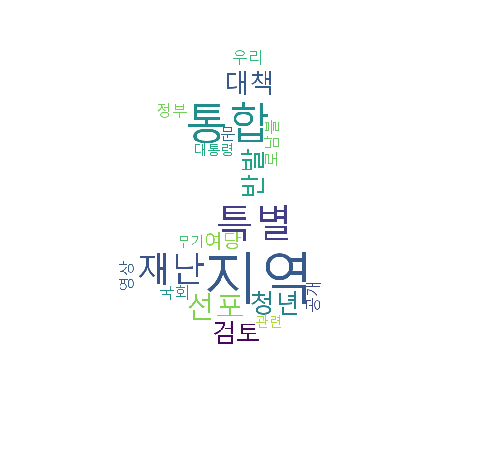

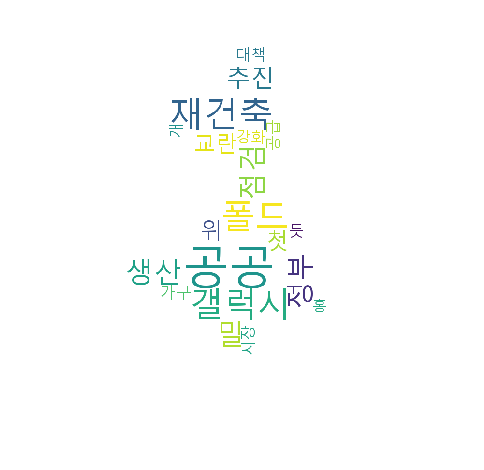

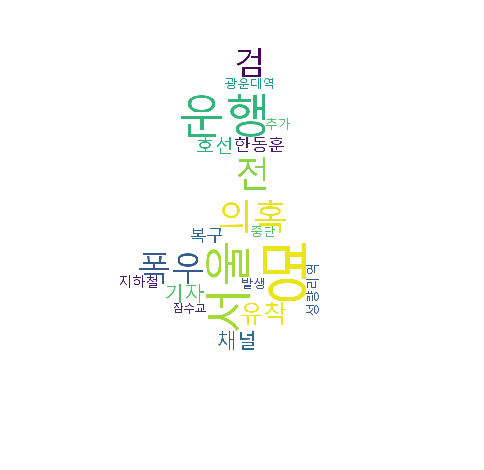

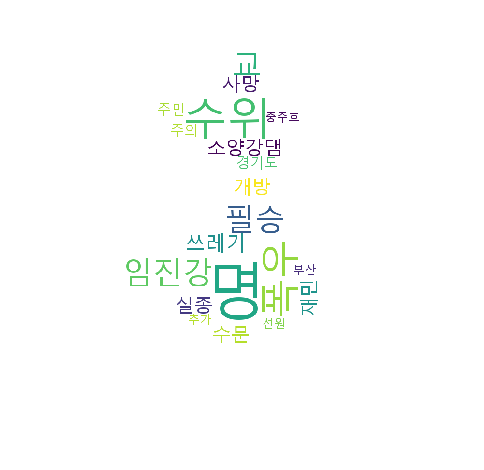

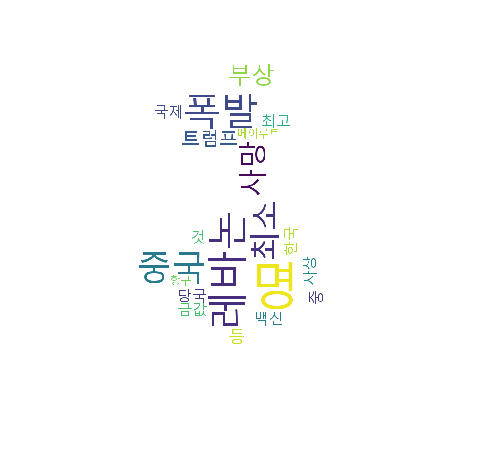

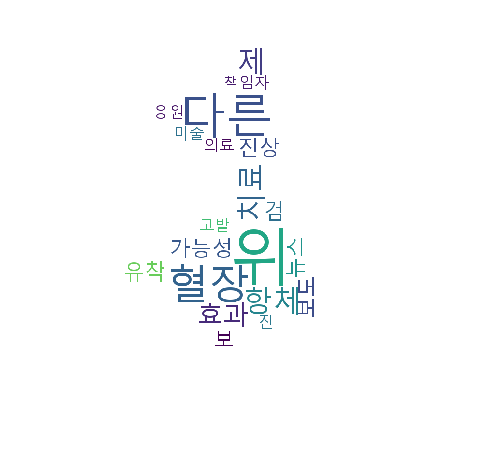

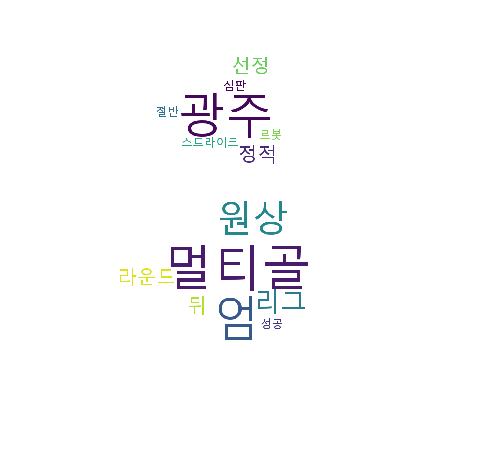

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np

%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats

count_list=['list/count/politics.txt','list/count/social.txt','list/count/economy.txt','list/count/domestic.txt',
           'list/count/International.txt','list/count/culture.txt','list/count/Sports.txt']
tag_list =[]
for i in count_list:
   
    open_text_file = open(i, 'r',encoding='euc-kr')
    text = open_text_file.read()
    split1 = text.split("\n")
    for i in split1:
        if i == '':
            break
        split2 = i.split(" ")
        split2[1] = int(split2[1])
        tags = tuple(split2)
        tag_list.append(tags)
        
    if not tag_list:
        continue
    font_path = 'C:/Windows/Fonts/malgun.ttf';
    alice_mask = np.array(Image.open("alice_mask.png"))
    wc = WordCloud( font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask)
    cloud = wc.generate_from_frequencies(dict(tag_list))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    print(i)
    plt.imshow(cloud)
    
    tag_list.clear()
        


In [180]:
############################################################
##########프로젝트 MBN 홈페이지 긁어오는 함수 코드##########
############################################################

import requests
import sys
from bs4 import BeautifulSoup
import json


def MBN_News_Function():
    
    count=0
    
    reresult_list=[]
    while count<7:
        
        if count==0:
            category_s='politics'
            MBN_url='https://www.mbn.co.kr/news/politics/'
        
        if count==1:
            category_s='economy'
            MBN_url='https://www.mbn.co.kr/news/economy/'

        elif count==2:
            category_s='society'
            MBN_url='https://www.mbn.co.kr/news/society/'

        elif count==3:
            category_s='world'
            MBN_url='https://www.mbn.co.kr/news/world/'

        elif count==4:
            category_s='culture'
            MBN_url='https://www.mbn.co.kr/news/culture/'

        elif count==5:
            category_s='entertain'
            MBN_url='https://www.mbn.co.kr/news/entertain/'        

        elif count==6:
            category_s='sports'
            MBN_url='https://www.mbn.co.kr/news/sports/'

        result_list=[]
        for i in range(1,4): #페이지번호
            params={
                'page':i,
                'vod':None,
                'category':category_s
            }
            resp=requests.get(MBN_url, params=params)

            resp.encoding='eur-kr'
            soup=BeautifulSoup(resp.text, "lxml")

            MBN_news_list=soup.select('div.list_area > dl.article_list > dt.tit > a')
            MBN_news_list_date=soup.select('div.list_area > dl.article_list > dd.desc > span.date')

            news_list=[]
            for news,date in zip(MBN_news_list, MBN_news_list_date):

                news=news.text.strip() #제목 내 띄어쓰기 제거
                news=news.replace("\'" , " ") #제목 내 따옴표 제거
                news=news.replace("♥" , " ") #제목 내 따옴표 제거
                news=news.replace("[포토]"," ") #제목 내 [포토] 제거

                date=date.text[0:10].replace("-","")

                if date == '20200805': #날짜 수정하면 됨
                    news_list.append(news)
            result_list.extend(news_list)
        
        count+=1
        
        
        reresult_list.append(result_list)
    return reresult_list






def MBN_Life_News_Function():

    category_s='life'
    MBN_url='https://www.mbn.co.kr/news/life/'
    result_list=[]
    
    re_list=[]
    for i in range(1,5): #페이지번호
        params={
            'page':i,
            'vod':None,
            'category':category_s
        }
        resp=requests.get(MBN_url, params=params)

        resp.encoding='eur-kr'
        soup=BeautifulSoup(resp.text, "lxml")
        
        MBN_news_list=soup.select('div.list_area > dl.article_list > dt.tit > a')
        MBN_news_list_date=soup.select('div.list_area > dl.article_list > dd.desc > span.date')

        life_news_list=[]
        for news,date in zip(MBN_news_list, MBN_news_list_date):

            news=news.text.strip() #제목 내 띄어쓰기 제거
            news=news.replace("\'" , " ") #제목 내 따옴표 제거
            news=news.replace("♥" , " ") #제목 내 따옴표 제거
            news=news.replace("[포토]"," ") #제목 내 [포토] 제거

            date=date.text[0:10].replace("-","")

            if date == '20200805': #날짜 수정하면 됨
                life_news_list.append(news)

        result_list.extend(life_news_list)
    return result_list






############################################################
#########프로젝트 MBN 메모장으로 꺼내오는 함수 코드#########
############################################################

# a1, 2, 3, 4 -> 정치
# b1, 2, 3, 4 -> 경제
# c1, 2, 3, 4 -> 사회
# d1, 2, 3, 4 -> 국제
# e1, 2, 3, 4 -> 생활&문화, 문화 + mbn생활건강 +ytn전국,과학
# f1, 2, 3, 4 -> 연예
# g1, 2, 3, 4 -> 스포츠

def MBN():

    title_list=['a','b','c','d','e','f','g']
    #나중에 j를 e로 바꿔서 추가해야함!

    f_list=[]
    for title in title_list:
        f=open('{}4.txt'.format(title),'w',-1,"utf-8")    
        f_list.append(f)


    MBN=MBN_News_Function()   # 2중리스트로 옴. [[1,2,3...] , [1,2,3...] , [1,2,3...]]


    for i, f in zip(MBN,f_list):
        for j in i:
            f.write(j)
            f.write('\n')
        f.close()

        
        

    ## 생활을 e에 추가    
    f_title_list=['e']


    for title in f_title_list:
        f=open('{}4.txt'.format(title),'a',-1,"utf-8")    


    life_To_Memo=MBN_Life_News_Function()


    for i in life_To_Memo:
        f.write(i)
        f.write('\n')
    f.close()
    
MBN()    